## Grading Rubric
### Business Understanding (10 points total).

• Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be specific.

(Nnenna)


We are predicting Injury Severity 

### Data Understanding (80 points total)

#### Data Meaning Type
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file.

(Nnenna)
#### Data Quality
• [15 points] Verify data quality: Explain any missing values, duplicate data, and outliers.
Are those mistakes? How do you deal with these problems? Be specific.

(Satvik and Dylan)
Data cleaning - added features, cleaned

scatter plots

#### Simple Statistics
• [10 points] Give simple, appropriate statistics (range, mode, mean, median, variance,
counts, etc.) for the most important attributes and describe what they mean or if you found something interesting. Note: You can also use data from other sources for comparison. Explain the significance of the statistics run and why they are meaningful.

(Dylan)
describe()

#### Visualize Attributes
• [15 points] Visualize the most important attributes appropriately (at least 5 attributes). Important: Provide an interpretation for each chart. Explain for each attribute why the chosen visualization is appropriate.

bar graph top makes or model

proportion plots - classification

Satvik

#### Explore Joint Attributes
• [15 points] Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

(Jobin)
boxplots - injury severity

correlation

violin plot 




#### Explore Attributes and Class
• [10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

Accuracy, precision, recall - categorical
ROC Curves, AUC

RMSE
(Jobin)

#### New Features
• [5 points] Are there other features that could be added to the data or created from existing features? Which ones?

Copy from earlier, use some columns for another dataset.

Dylan/Satvik

#### Exceptional Work (10 points total)
• You have free reign to provide additional analyses.
• One idea: implement dimensionality reduction, then visualize and interpret the results.  

# Business Understanding

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

import plotly.express as px
import plotly.graph_objects as go

In [117]:
aviation_data = pd.read_csv("Data/AviationData.csv")
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'LOCATION', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

Need to convert Total Injuries to integer, clean up fails, remove 8 engine NASA flight, drop the remaining columns, Injury Severity, that we are going to remove:

Event.db, Accident.Number, Far.Description, Longitude, Latitude, Airport Code, Total Serious Injuries, Total.Minor.Injuries, Total.Fatal.Injuries, Publication.Date, Registration.Number, LOCATION, Accident.Number


Total Injuries = Total Serious Injuries + Total.Minor.Injuries + Total.Fatal.Injuries
Location = City, State



Report.Status?

In [118]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

In [119]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,Ferry,NaN,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,Aobv,Caribbean Buzz Management Llc.,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,Personal,Paul Andrews,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,Instructional,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,Personal,Case Robert,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN


In [120]:
#splitting state and city from location
aviation_data['City'] = aviation_data['LOCATION'].str.split(',').str[0]
aviation_data['State'] = aviation_data['LOCATION'].str.split(',').str[1]
#dropping location since we now have state and city

In this section, we will verify the data quality, explain missing values, duplicate data, and outliers. We will also deal with missing values and address any points of interest.

Something we would like to do before looking at missing values is make the data easier to read by adding some columns. We will split the "LOCATION" column into "City" and "State"

Next, we will add a column called "Total Injuries" which is the sum of Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries.


# Data Meaning/Type

In [121]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85976 entries, 0 to 85975
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                85976 non-null  object 
 1   Investigation.Type      85963 non-null  object 
 2   Accident.Number         85976 non-null  object 
 3   Event.Date              85976 non-null  object 
 4   LOCATION                85898 non-null  object 
 5   Country                 85469 non-null  object 
 6   Latitude                31587 non-null  float64
 7   Longitude               31578 non-null  float64
 8   Airport.Code            48612 non-null  object 
 9   Airport.Name            51298 non-null  object 
 10  Injury.Severity         85842 non-null  object 
 11  Aircraft.damage         83047 non-null  object 
 12  Aircraft.Category       29226 non-null  object 
 13  Registration.Number     81756 non-null  object 
 14  Make                    85908 non-null

# Verify Data Quality

In [122]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,LOCATION,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,City,State
0,2.02102E+13,Accident,CEN21FA130,2021-02-16,"JANESVILLE, WI",United States,42.595377,-89.030245,NaN,NaN,...,2.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN,JANESVILLE,WI
1,2.02102E+13,Accident,ERA21FA130,2021-02-15,"St Thomas, CB",United States,18.354444,-65.027778,NaN,NaN,...,4.0,0.0,0.0,0.0,VMC,NaN,NaN,NaN,St Thomas,CB
2,2.02102E+13,Accident,ANC21LA017,2021-02-13,"TYONEK, AK",United States,61.336392,-152.016430,NaN,NaN,...,0.0,0.0,2.0,0.0,NaN,NaN,NaN,NaN,TYONEK,AK
3,2.02102E+13,Accident,CEN21LA127,2021-02-12,"PRAIRIE DU SAC, WI",United States,43.297731,-89.755693,91C,SAUK-PRAIRIE,...,0.0,0.0,0.0,1.0,VMC,NaN,NaN,NaN,PRAIRIE DU SAC,WI
4,2.02102E+13,Accident,ERA21LA131,2021-02-10,"LAKE PLACID, FL",United States,27.243723,-81.413767,09FA,NaN,...,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,LAKE PLACID,FL


Looking at the head of the data we can see some redundant columns such as location, since we split it into state and city, some missing values and a few opportunites to combine data and create new columns such as Total Injuries. Other columns of interest are Event ID which appears to have been transformed by a program like excel in order to fit all the charactors and Accident number which could be used to check for duplicates.

In [123]:
#We have 30 columns to work with
#First we will check to see what percent of each column is null

#Percent of missing data
percent_missing = aviation_data.isnull().sum() * 100 / len(aviation_data)
#Create DF 
missing_value_df = pd.DataFrame({'column_name': aviation_data.columns,
                                 'percent_missing': percent_missing})
#Then sort by least to most
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
Air.carrier,Air.carrier,94.660138
Schedule,Schedule,85.834419
FAR.Description,FAR.Description,66.352238
Aircraft.Category,Aircraft.Category,66.006793
Longitude,Longitude,63.271145
Latitude,Latitude,63.260677
Airport.Code,Airport.Code,43.458640
Airport.Name,Airport.Name,40.334512
Total.Serious.Injuries,Total.Serious.Injuries,35.486647
Total.Minor.Injuries,Total.Minor.Injuries,34.057179


What we can see from the missing data above is categories such as Air Carrier and schedule are missing the most. When prodicting with this dataset we will primarly forcus on total number of injuries and Injury severity. Something to consider with the missing data in air carrier is if there was a corrlation between air carrier and plane crashes I don't beleive that business would still be operating.

Regarding many of the missing values in the fields: Total Fatal Injuries, Total Minor Injuries and Total Serious Injuries: we will be adding a total injuries column and consult outside sources to confirm these nulls as 0s. In this report some lack of injuries were marked as NaN to indicate that someone did not sustain an injury.

In [124]:
#dropping FAR.Descripiton, schedule, air.carrier due to a lack of data
#dropping location as it is redundant to city, state and country
#also dropping column named "text" I am not sure how that got into our df
rc_aviation = aviation_data.copy()
rc_aviation = rc_aviation.drop(columns=['FAR.Description', 'Event.Id',"Longitude",
                                        "Latitude","Airport.Code","Publication.Date","Registration.Number","LOCATION",
                                        "Schedule","Event.Date"])
rc_aviation.columns

Index(['Investigation.Type', 'Accident.Number', 'Country', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status', 'City',
       'State'],
      dtype='object')

In [125]:
#checking for duplicates
#before we step into ourliars we would like to look for duplicates
#using the field acident number we will search for duplicates

rc_aviation[rc_aviation.duplicated(subset=['Accident.Number'])]


,Investigation.Type,Accident.Number,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,City,State
973,Accident,ERA20CA175,United States,BROOKHAVEN,Non-Fatal,Substantial,Airplane,Waco,QCF,No,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,SHIRLEY,NY


In [126]:
#now that we see we have a duplicate lets compare them
rc_aviation[rc_aviation['Accident.Number']=='ERA20CA175']

,Investigation.Type,Accident.Number,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,City,State
972,Accident,ERA20CA175,United States,BROOKHAVEN,Non-Fatal,Substantial,Airplane,Waco,QCF,No,...,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,SHIRLEY,NY
973,Accident,ERA20CA175,United States,BROOKHAVEN,Non-Fatal,Substantial,Airplane,Waco,QCF,No,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,SHIRLEY,NY


In [127]:
#remove the duplicate and merge in the data
rc_aviation = rc_aviation.drop_duplicates(subset='Accident.Number', keep="last")
rc_aviation[rc_aviation['Accident.Number']=='ERA20CA175'] #Checking for dups
#replace missing values in the duplicate kept - change report status from NaN to Preliminary
#rc_avaition.loc[rc_avaition['Accident.Number'] == , 'ERA20CA175'] = 1

,Investigation.Type,Accident.Number,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,City,State
973,Accident,ERA20CA175,United States,BROOKHAVEN,Non-Fatal,Substantial,Airplane,Waco,QCF,No,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,SHIRLEY,NY


Using Accident Number as an indicator we checked of duplicates. There was one that we found which looked to be entered twice and is clearly an error. That duplicate was removed.

In [128]:
#Good
flightphase=rc_aviation["Broad.phase.of.flight"].value_counts().reset_index()
flightphase


,index,Broad.phase.of.flight
0,Landing,20857
1,Takeoff,16428
2,Cruise,11227
3,Maneuvering,10428
4,Approach,8223
5,Taxi,2512
6,Climb,2379
7,Descent,2320
8,Go-around,1705
9,Standing,1324


In [129]:
#convert "sirouse" to Fatal 
#there are many dup values in the injury servarity column that need to be converted
injuryseverity=rc_aviation["Injury.Severity"].value_counts().reset_index()
pd.set_option('display.max_rows', 500)
injuryseverity
# correcting inconsistant categories to: Non-Fatal, Incident, Unavailable, Fatal, Minor, Siruose


,index,Injury.Severity
0,Non-Fatal,64384
1,Fatal(1),8435
2,Fatal(2),4970
3,Incident,3652
4,Fatal(3),1552
5,Fatal(4),1077
6,Fatal(5),341
7,Unavailable,307
8,Fatal(6),211
9,Fatal,190


In [146]:
#replace fatal# with just fatal
rc_aviation.loc[rc_aviation['Injury.Severity'].str.contains('Fatal', na=False), 'Injury.Severity'] = 'Fatal'
#fill in NA values with Unavailable
rc_aviation['Injury.Severity'] = rc_aviation['Injury.Severity'].fillna("Unavailable")
#fix spelling error of Siruose
rc_aviation.loc[rc_aviation['Injury.Severity'].str.contains('Siruose', na=False), 'Injury.Severity'] = 'Serious'
injuryseverity=rc_aviation["Injury.Severity"].value_counts().reset_index()
injuryseverity

,index,Injury.Severity
0,Fatal,81658
1,Incident,3652
2,Unavailable,441
3,Minor,122
4,Seriouse,101


One big issue with this dataset was in the inconsistant catigorical variables. We noticed that injury servarity had multipal redundant catorgies that we needed to clean up. After cleanup we are left with 5 final categories which are recongized by NTSB as: Fatal, Incident, Unavailable, Minor, Serious.

In [141]:
#adding a total injuries column
#next we need to fill in the NaN values with the injury columns in order to make our new column
#many of the rows filled in NaN opposed to 0 for number of injuries
rc_aviation.update(rc_aviation[['Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']].fillna(0))

rc_aviation["Total_Injuries"] = rc_aviation['Total.Fatal.Injuries'] \
                            + rc_aviation['Total.Serious.Injuries'] \
                            + rc_aviation['Total.Minor.Injuries']
num_inj=rc_aviation[["Total_Injuries",'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries',]]
num_inj

,Total_Injuries,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries
0,2.0,2.0,0.0,0.0
1,4.0,4.0,0.0,0.0
2,2.0,0.0,0.0,2.0
3,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0
...,...,...,...,...
85971,3.0,1.0,2.0,0.0
85972,2.0,2.0,0.0,0.0
85973,3.0,3.0,0.0,0.0
85974,4.0,4.0,0.0,0.0


In [145]:
rc_aviation.update(rc_aviation.fillna("Unknown"))
rc_aviation.head()

,Investigation.Type,Accident.Number,Country,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,City,State,Total_Injuries
0,Accident,CEN21FA130,United States,Unknown,Fatal,Substantial,Airplane,Velocity,Vtwin,No,...,2.0,0.0,0.0,0.0,VMC,Unknown,Unknown,JANESVILLE,WI,2.0
1,Accident,ERA21FA130,United States,Unknown,Fatal,Destroyed,Helicopter,Bell,206,No,...,4.0,0.0,0.0,0.0,VMC,Unknown,Unknown,St Thomas,CB,4.0
2,Accident,ANC21LA017,United States,Unknown,Minor,Substantial,Airplane,Maule,M-6-235,No,...,0.0,0.0,2.0,0.0,Unknown,Unknown,Unknown,TYONEK,AK,2.0
3,Accident,CEN21LA127,United States,SAUK-PRAIRIE,Fatal,Substantial,Airplane,Cessna,172N,No,...,0.0,0.0,0.0,1.0,VMC,Unknown,Unknown,PRAIRIE DU SAC,WI,0.0
4,Accident,ERA21LA131,United States,Unknown,Minor,Substantial,Airplane,Piper,PA-18,No,...,0.0,0.0,1.0,0.0,Unknown,Unknown,Unknown,LAKE PLACID,FL,1.0


In [132]:
#Summary of the data for continious variables
#here we are looking for outliars and to see if median or mean can be used to fill in missing values
rc_aviation.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Total_Injuries
count,80398.0,85975.0,85975.0,85975.0,71091.0,85975.0
mean,1.1,0.6,0.2,0.3,6.1,1.1
std,0.4,5.2,1.1,2.4,30.2,6.1
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,1.0,0.0,0.0,0.0,0.0,0.0
50%,1.0,0.0,0.0,0.0,1.0,0.0
75%,1.0,0.0,0.0,0.0,2.0,1.0
max,8.0,349.0,111.0,380.0,699.0,380.0


In [133]:
#dealing with outliars
engines=rc_aviation["Number.of.Engines"].value_counts().reset_index()
engines

,index,Number.of.Engines
0,1.0,67513
1,2.0,10793
2,0.0,1182
3,3.0,481
4,4.0,428
5,8.0,1


In [134]:
#we have one large plane at 8 engines we will remove it since there is only one value. 8 Engine planes are rare.
rc_aviation = rc_aviation.loc[rc_aviation["Number.of.Engines"]!=8.0]
engines=rc_aviation["Number.of.Engines"].value_counts().reset_index()
engines
#what is a 0 engine plane? hillicopter?

,index,Number.of.Engines
0,1.0,67513
1,2.0,10793
2,0.0,1182
3,3.0,481
4,4.0,428


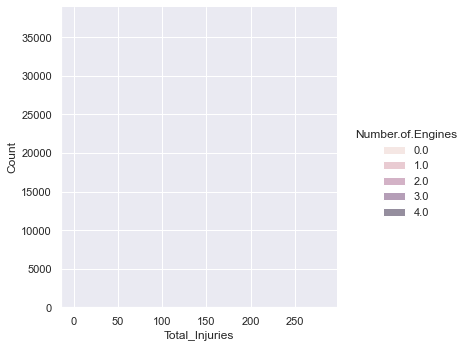

In [135]:
#injury outliars
#one thing to note about our dataset is it is heavily right skewed which means the majority of our data values are low
#this should be the case since high fatality flights are rare compared to samller 2-4 person planes
sns.displot(rc_aviation,x= "Total_Injuries", hue = "Number.of.Engines")
plt.show()

In [ ]:
inj_stat = rc_aviation[["Total_Injuries",'Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries']]
inj_stat.plot.kde()
                       

# Simple Statisitics

In [ ]:
rc_aviation.plot.scatter("Total_Injuries","Total.Uninjured")

In [ ]:
#looking at accidents by Country
aviation_country = rc_aviation['Country'].groupby(rc_aviation['Country']).count()
aviation_country
